<a href="https://colab.research.google.com/github/javeed999/DSA/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2 +np.random.randn(100,1)
print(x.shape)
print()
print(y.shape)

(100, 1)

(100, 1)


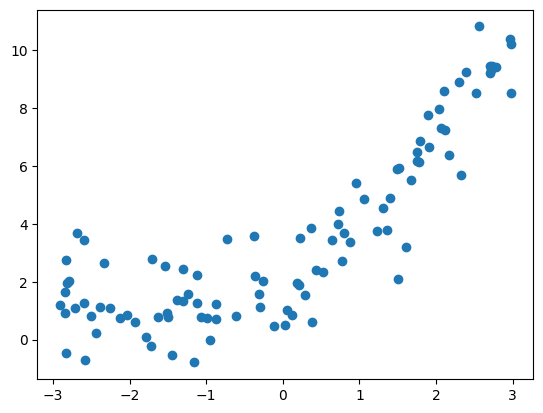

In [3]:
plt.scatter(x,y)

In [4]:
# arr=np.array([-0.51733692 , 0.48813676, -0.88147002,  1.12901958,  0.68026197])
# mean=np.mean( arr)


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [7]:
y_pred=regression.predict(x_test)


In [8]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [9]:
score

0.780641269675384

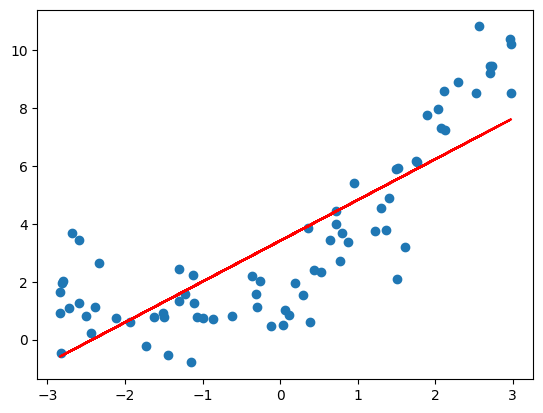

In [10]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color="r")

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [12]:
from sklearn.linear_model import LinearRegression
regression2=LinearRegression()
regression2.fit(x_train_poly,y_train)

LinearRegression()

In [13]:
y_pred_poly=regression2.predict(x_test_poly)
score1=r2_score(y_test,y_pred_poly)
print(score1)

0.830954515664505


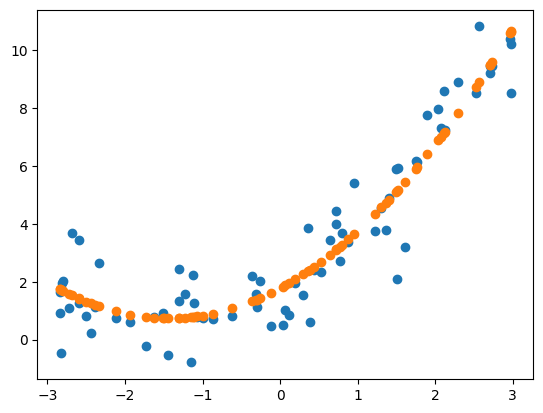

In [14]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regression2.predict(x_train_poly))

In [15]:
print(regression2.coef_)


[[0.         1.46381535 0.51143083]]


In [16]:
print(regression2.intercept_)

[1.78080078]


In [17]:
x_train_poly

array([[ 1.00000000e+00,  2.29793767e+00,  5.28051756e+00],
       [ 1.00000000e+00, -2.59933393e+00,  6.75653690e+00],
       [ 1.00000000e+00,  3.81781893e-01,  1.45757414e-01],
       [ 1.00000000e+00, -2.49663488e+00,  6.23318575e+00],
       [ 1.00000000e+00,  1.39848843e+00,  1.95576989e+00],
       [ 1.00000000e+00, -2.56756321e-01,  6.59238083e-02],
       [ 1.00000000e+00, -2.58995905e+00,  6.70788788e+00],
       [ 1.00000000e+00, -1.30512152e+00,  1.70334217e+00],
       [ 1.00000000e+00,  7.94736559e-01,  6.31606198e-01],
       [ 1.00000000e+00, -1.12483404e-01,  1.26525162e-02],
       [ 1.00000000e+00, -2.33158807e+00,  5.43630293e+00],
       [ 1.00000000e+00, -1.12171368e+00,  1.25824157e+00],
       [ 1.00000000e+00,  5.28719034e-01,  2.79543817e-01],
       [ 1.00000000e+00, -1.72477783e+00,  2.97485855e+00],
       [ 1.00000000e+00,  2.96061507e+00,  8.76524157e+00],
       [ 1.00000000e+00, -2.39031925e+00,  5.71362611e+00],
       [ 1.00000000e+00, -3.60081921e-01

In [31]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
  x_new=np.linspace(-3,3,200).reshape(200,1)
  poly_features=PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg=LinearRegression()
  poly_regression=Pipeline([
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ])
  poly_regression.fit(x_train,y_train)
  y_pred_new=poly_regression.predict(x_new)
  plt.scatter(x_new,y_pred_new,linewidth=1)
  plt.scatter(x_train,y_train)
  plt.scatter(x_test,y_test)

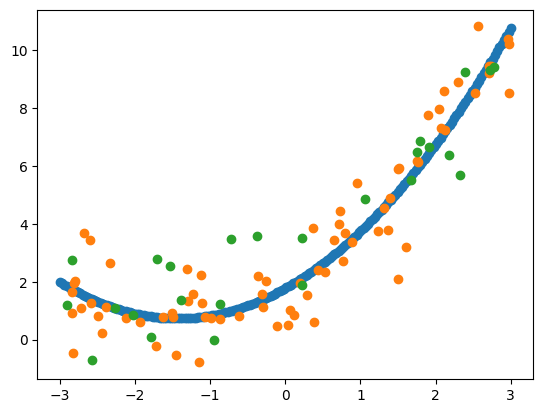

In [32]:
poly_regression(2)